# Stats analysis of chapter 2

Looking at Fluctuating Asymmetry (FA) as a function of distance to range edge and forest cover

### Load packages

In [1]:
library(brms) # for Bayesian analysis
library(tidyverse) # for tidy code
library(egg) # for nice professional figures
library(lme4) # for frequentist analysis
library(lmerTest) # for p-values
library(GGally) # for ggpairs


load("./FA_analysis.RData")

Loading required package: Rcpp

Loading 'brms' package (version 2.16.1). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching p

In [2]:
getwd()

[1] "/Users/tom/OneDrive - Imperial College London/1.PHD/2.R-dir/2.chapter/2.notebook"

### Load forest cover data

In [3]:
FC <- read_csv("../2.data_cleaned/FC_calculated.csv", 
               col_types = cols(
                  species = col_character(),  # load column as character
                  bird_id = col_character()
                    )) %>% dplyr::select(-"X0")

In [4]:
head(FC)

species,decade,biome,bird_id,lon_dd,lat_dd,dist_km,geometry,file_name,FC_buffer,FC_percentage.value
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Vireo_olivaceus,1995,AMAZONIA,105244,-63.02141,-7.516036,1059.84,"c(-63.0214128, -7.5160361)",COLECAO_5_AMAZONIA-1995.tif,100,NA
Vireo_olivaceus,1995,AMAZONIA,105244,-63.02141,-7.516036,1059.84,"c(-63.0214128, -7.5160361)",COLECAO_5_AMAZONIA-1995.tif,200,1.428571
Vireo_olivaceus,1995,AMAZONIA,105244,-63.02141,-7.516036,1059.84,"c(-63.0214128, -7.5160361)",COLECAO_5_AMAZONIA-1995.tif,300,5.128205
Vireo_olivaceus,1995,AMAZONIA,105244,-63.02141,-7.516036,1059.84,"c(-63.0214128, -7.5160361)",COLECAO_5_AMAZONIA-1995.tif,400,7.308378
Vireo_olivaceus,1995,AMAZONIA,105244,-63.02141,-7.516036,1059.84,"c(-63.0214128, -7.5160361)",COLECAO_5_AMAZONIA-1995.tif,500,7.798165
Vireo_olivaceus,1995,AMAZONIA,105244,-63.02141,-7.516036,1059.84,"c(-63.0214128, -7.5160361)",COLECAO_5_AMAZONIA-1995.tif,600,8.047809


#### Make sure that all NAs in column percentage of FC are zeros
The function used to calculate FC in the previous script would give NAs if the landscape metric 'proportion of class' (3 for FC in MAPBIOMAS) was innexistent. That means that forest cover was innexistent, therefore NA = 0%. That happened often for smaller buffer radius like 100 m.  

In [5]:
FC$FC_percentage.value[is.na(FC$FC_percentage.value)] <- 0

### Load distance to range edge data

In [6]:
dist <- read_csv("../2.data_cleaned/NHM-MZUSP_dist2edge_data.csv")%>%
  dplyr::select(-c(11:14)) %>%  # remove unnecessary columns
  dplyr::select(-"feather_tail") # remove feather_tail column


── Column specification ────────────────────────────────────────────────────────
cols(
  species = col_character(),
  subspecies = col_character(),
  date_collected = col_double(),
  bird_id = col_character(),
  lon_dd = col_double(),
  lat_dd = col_double(),
  location = col_character(),
  sex = col_character(),
  feather_tail = col_character(),
  source = col_character(),
  distance = col_double(),
  inrange = col_logical(),
  in_costal_margin = col_logical(),
  distance_sgn = col_double(),
  dist_km = col_double()
)




In [7]:
head(dist)

species,subspecies,date_collected,bird_id,lon_dd,lat_dd,location,sex,source,dist_km
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,"Aguas Mornas, SC, Brasil",female,MZUSP,573.7955
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,"Morro Grande, Nova Roma, Pousada Rancho Fundo, SC, Brasil",na,MZUSP,438.8556
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,"Guaraqueçaba, Utinga, PR, Brasil",female,MZUSP,737.7786
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2002,75697,-49.80359,-23.87488,"Wenceslau Bras, PR, Brasil",female,MZUSP,521.2166
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2002,75631,-50.00111,-23.93333,"Fazenda Chapadão, Pinhalão, PR, Brasil",male,MZUSP,512.9594
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2012,93205,-45.88944,-23.65417,"Estacao Biologica de Boraceia, Salesópolis, SP, Brasil",na,MZUSP,689.6465


#### Manipulate distance to range edge data
Create function to mantain the sign (negative or positive) of the distances to the range edge when calculating the square root. A negative number distance represents incidence outside the species range, a positive number represents the distance from the range edge inside the range. 
 

In [8]:
# function to mantain the sign of distance (negative or positive) while calculating sqrt
sqrt_sign <- function(x){sign(x) * sqrt(abs(x))}

# calculate sqrt dist in km
dist <- dist %>%
  mutate(sqrt_dist = sqrt_sign(dist_km)) %>%
  relocate(sqrt_dist, .after = dist_km)

### Load FA data

In [9]:
# load fluctuating asymmetry data
FA <-read_csv("../2.data_cleaned/fa/NHM-MZUSP_fa_wing_tarsus.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  species = col_character(),
  subspecies = col_character(),
  date_collected = col_double(),
  bird_id = col_character(),
  lon_dd = col_double(),
  lat_dd = col_double(),
  sex = col_character(),
  source = col_character(),
  type = col_character(),
  unit = col_character(),
  mean_l = col_double(),
  mean_r = col_double(),
  sd_l = col_double(),
  sd_r = col_double(),
  fa_left_right = col_double(),
  fa_ratio = col_double(),
  fa_abs_mm = col_double()
)




In [10]:
head(FA)

species,subspecies,date_collected,bird_id,lon_dd,lat_dd,sex,source,type,unit,mean_l,mean_r,sd_l,sd_r,fa_left_right,fa_ratio,fa_abs_mm
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,female,MZUSP,w,mm,88.50000,87.84000,0.05000000,0.08717798,0.6600000,1.0075137,0.6600000
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,female,MZUSP,t,mm,22.88667,23.14000,0.08020806,0.14422205,-0.2533333,0.9890521,0.2533333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,na,MZUSP,w,mm,89.97000,90.95333,0.01000000,0.05033223,-0.9833333,0.9891886,0.9833333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,na,MZUSP,t,mm,22.70333,21.84333,0.12662280,0.05507571,0.8600000,1.0393713,0.8600000
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,female,MZUSP,w,mm,83.42333,83.01000,0.13576941,0.05000000,0.4133333,1.0049793,0.4133333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,female,MZUSP,t,mm,21.84000,21.24667,0.03464102,0.14502873,0.5933333,1.0279259,0.5933333


### Manipulate FA data for analysis

Join FA dataset to the distances dataset

In [11]:
FA_data <- dist %>% dplyr::left_join(FA) 

Joining, by = c("species", "subspecies", "date_collected", "bird_id", "lon_dd", "lat_dd", "sex", "source")



Now join the FA and dist data set to the forest cover dataset

In [12]:
FA_FC_data <- FA_data %>% dplyr::left_join(FC) %>%
    filter(fa_abs_mm != 0) %>%
    mutate(log_fa = log(fa_abs_mm)) 

names(FA_FC_data)

Joining, by = c("species", "bird_id", "lon_dd", "lat_dd", "dist_km")



[1] "species"             "subspecies"          "date_collected"     
 [4] "bird_id"             "lon_dd"              "lat_dd"             
 [7] "location"            "sex"                 "source"             
[10] "dist_km"             "sqrt_dist"           "type"               
[13] "unit"                "mean_l"              "mean_r"             
[16] "sd_l"                "sd_r"                "fa_left_right"      
[19] "fa_ratio"            "fa_abs_mm"           "decade"             
[22] "biome"               "geometry"            "file_name"          
[25] "FC_buffer"           "FC_percentage.value" "log_fa"

I use the variance in the signed difference between L and R as a measure of FA. This is because it is suggested in this [paper](https://resjournals.onlinelibrary.wiley.com/doi/epdf/10.1046/j.1365-2311.2000.00204.x). I dont explictly correct for size of the trait but I could do it if the model converges in the future....

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



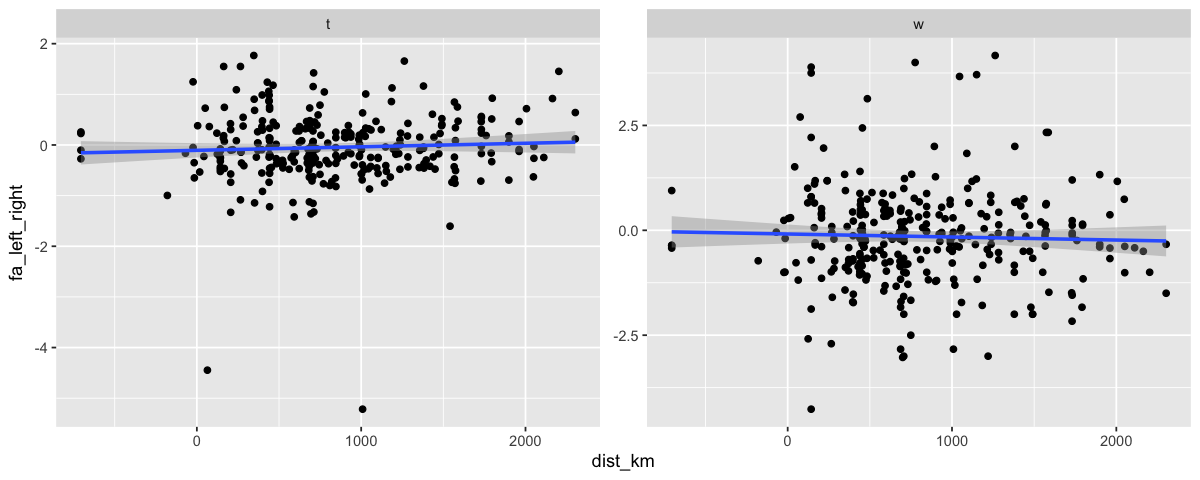

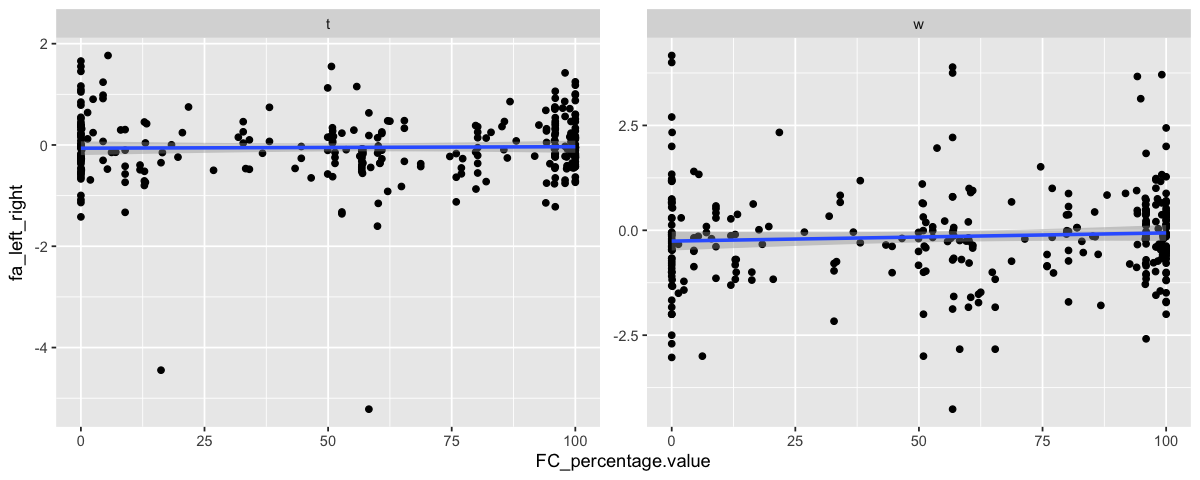

In [109]:
options(repr.plot.width=10, repr.plot.height=4)

FA_FC_data %>%
mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
filter(FC_buffer == 600) %>%
ggplot(aes(x=dist_km, y=fa_left_right))+
       geom_point()+
       geom_smooth(method = "lm")+
        facet_wrap(~type, scales = "free")

FA_FC_data %>%
mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
filter(FC_buffer == 600) %>%
ggplot(aes(x=FC_percentage.value, y=fa_left_right))+
       geom_point()+
       geom_smooth(method = "lm")+
        facet_wrap(~type, scales = "free")

## Model Fitting

Fit a model predicting variance as a function of distance to range edge plus a random effect of species on distance. Also filter out the individuals who are outside their range (sqrt_dist >0 )

In [130]:
FA_FC_data %>%
    write_csv("../2.data_cleaned/FA_FC_final.csv")

In [129]:
set.seed(1)

bay_mod_t <- FA_FC_data %>%
mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
filter(FC_buffer == 600, type == "t", dist_km >= 0) %>%
brm(bf(fa_left_right ~ 0, sigma ~ log(dist_km) + (log(dist_km) | species)),
    data = .,
    family = gaussian,
    cores = 4, chains = 4, iter = 10000, 
    control=list(adapt_delta = 0.99))

Compiling Stan program...

Start sampling



In [117]:
summary(bay_mod_t)

Warning message:
“There were 8 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = log 
Formula: fa_left_right ~ 0 
         sigma ~ log(dist_km) + (log(dist_km) | species)
   Data: . (Number of observations: 284) 
  Draws: 4 chains, each with iter = 10000; warmup = 5000; thin = 1;
         total post-warmup draws = 20000

Group-Level Effects: 
~species (Number of levels: 23) 
                                      Estimate Est.Error l-95% CI u-95% CI Rhat
sd(sigma_Intercept)                       1.23      0.75     0.22     3.00 1.00
sd(sigma_logdist_km)                      0.16      0.11     0.01     0.42 1.00
cor(sigma_Intercept,sigma_logdist_km)    -0.74      0.43    -1.00     0.65 1.00
                                      Bulk_ESS Tail_ESS
sd(sigma_Intercept)                       3452     6712
sd(sigma_logdist_km)                      2366     4671
cor(sigma_Intercept,sigma_logdist_km)     4167     6460

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sig

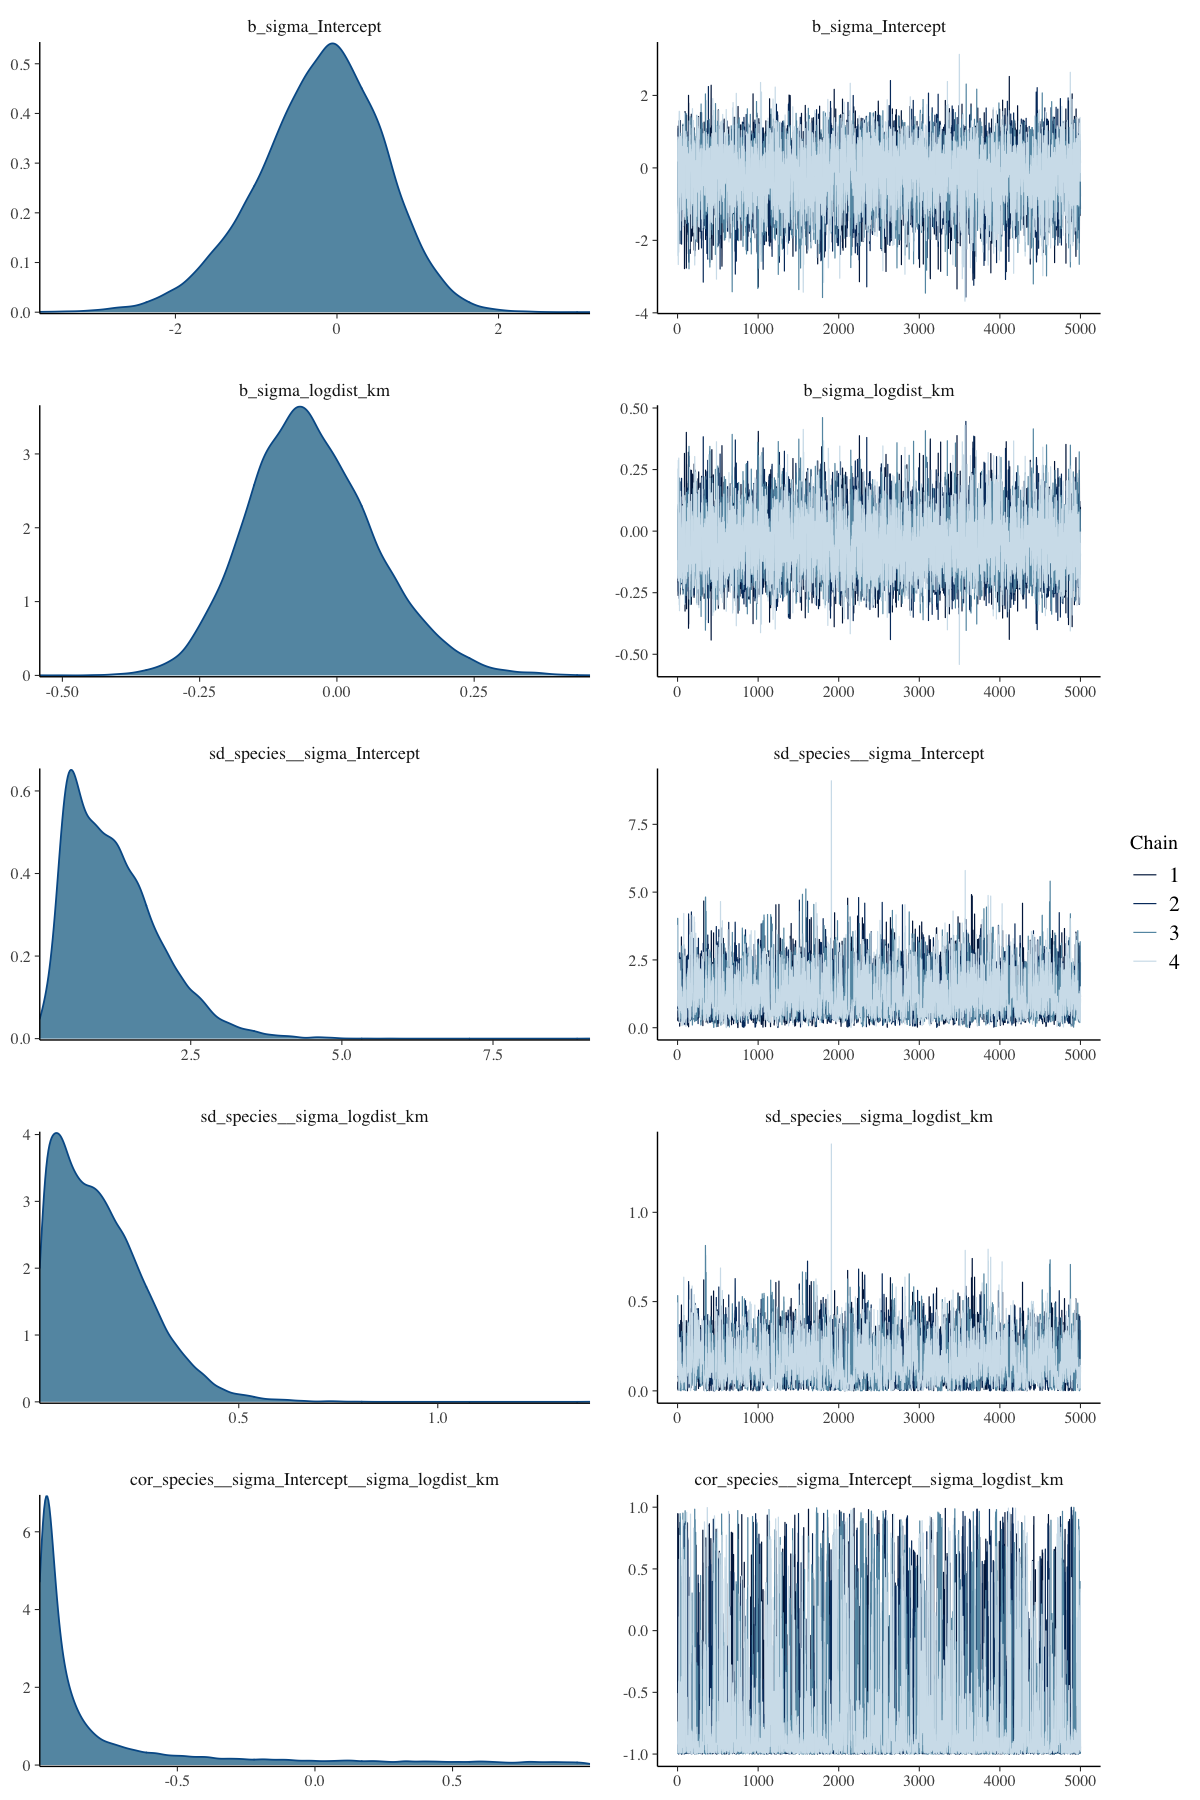

In [118]:
options(repr.plot.width=10, repr.plot.height=15)

plot(bay_mod_t)

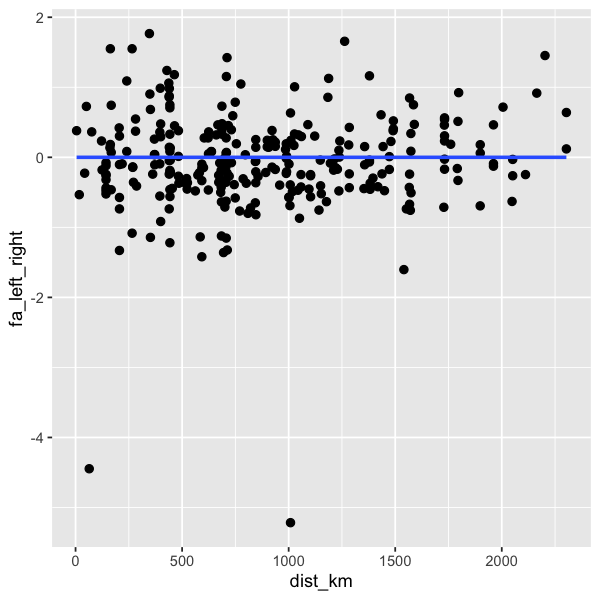

In [120]:
options(repr.plot.width=5, repr.plot.height=5)

plot(conditional_effects(bay_mod_t), points = TRUE)

In [125]:
hypothesis(bay_mod_t, "sigma_logdist_km < 0")

Hypothesis Tests for class b:
              Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio
1 (sigma_logdist_km) < 0    -0.05      0.12    -0.22     0.16       2.07
  Post.Prob Star
1      0.67     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [ ]:
FA_FC_data %>%
mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
ggplot(aes(x=log(ind_size_fa), y=fa_abs_mm))+
       geom_point()+
       geom_smooth()+
        facet_wrap(~type, scales = "free")

Wing seems to have higher variance with increasing individual size. So divide wing FA by the individual size FA - do the same for tarsus if though that's okay to keep it standardised.

If I change the variable to normalise it (i.e. sqrt), then use gaussian family
Or instead of normalising the data, try to run the model with beta or gamma families - check how to set priors for those.

In [ ]:
FA_FC_data <- FA_FC_data %>%
                mutate(ind_trait_size = (mean_l + mean_r)/2)%>%
                mutate(fa_trait_size_scaled = sqrt(fa_abs_mm / (ind_trait_size)))



FA_FC_data %>%
    ggplot(aes(x=sqrt_dist, y=fa_trait_size_scaled))+
       geom_point()+
       geom_smooth()+
       facet_wrap(~type, scales = "free")

### Inspect FA data

Look at the histogram of total FA (difference between left and right - the abs column doesn't distinguish if it is left or right). I will use the fa_abs_mm column because I am not looking at directional asymmetry. 

In [ ]:
ggplot(FA_FC_data, aes(x=fa_trait_size_scaled)) + 
  geom_histogram(bins = 30)+
    facet_wrap(~type)

ggplot(FA_FC_data, aes(x=fa_trait_size_scaled, y=species)) + 
  geom_violin()+
    facet_wrap(~type)
    
FA_FC_data %>%
filter(FC_buffer == 600) %>%
ggpairs(columns = c('fa_trait_size_scaled', 'FC_percentage.value', 'sqrt_dist'), 
        ggplot2::aes(colour=type, alpha=0.8))+
theme_article()

### Bayesian models for FA (wing)

First look at FA ~ dist to edge + random effects only.

In [ ]:
FA_w_fit <- FA_FC_data %>%
            filter(type == "w") %>%
               brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist + (sqrt_dist|species), 
                   data = ., 
                   family = gaussian(link = "identity"),
                   cores = 4, chains = 4,
                        control = list(max_treedepth = 15))

In [ ]:
pairs(FA_w_fit)

In [ ]:
plot(FA_w_fit)

plot(conditional_effects(FA_w_fit), points = TRUE)

In [ ]:
hypothesis(FA_w_fit, "sqrt_dist < 0")

In [ ]:
FA_w_fit <- FA_FC_data %>%
            filter(dist_km >= 0, type == "w") %>%
               brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist + (sqrt_dist|species), 
                   data = ., 
                   family = gaussian(link = "identity"),
                   cores = 4, chains = 4)

### Bayesian models for FA (tarsus)

First look at FA ~ dist to edge + random effects only.

In [ ]:
FA_t_fit <- FA_FC_data %>%
            filter(type == "t") %>%
               brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist + (sqrt_dist|species), 
                   data = ., 
                   family = gaussian(link = "identity"),
                   prior = set_prior("normal(0,5)", class = "b"),
                   cores = 4, chains = 4, iter=5000)

In [ ]:
summary(FA_t_fit)

In [ ]:
plot(FA_t_fit)

plot(conditional_effects(FA_t_fit), points = TRUE)

In [ ]:
hypothesis(FA_t_fit, "sqrt_dist < 0")

In [ ]:
colnames(FA_FC_data)

### Bayesian models for FA (wing) with FC

First look at FA ~ dist to edge + forest cover + random effects.

(I increased the adapt_delta from the default 0.8 to 0.9 due to divergent interactions)

In [25]:
FA_w_FC_fit <- FA_FC_data %>%
            filter(type == "w", FC_buffer == 600) %>%
                brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist * FC_percentage.value +(sqrt_dist|species), 
                    data = ., 
                    family = gaussian(link = "identity"),
                    prior = set_prior("normal(0,5)", class = "b"),
                    cores = 4, chains = 4, iter = 5000, 
                         control=list(adapt_delta = 0.9))

ERROR: Error: The following variables can neither be found in 'data' nor in 'data2':
'fa_trait_size_scaled'


In [ ]:
summary(FA_w_FC_fit)

In [ ]:
pairs(FA_w_FC_fit)

In [ ]:
plot(FA_w_FC_fit)

plot(conditional_effects(FA_w_FC_fit), points = TRUE)

In [ ]:
hypothesis(FA_w_FC_fit, "sqrt_dist < 0")

In [ ]:
hypothesis(FA_w_FC_fit, "FC_percentage.value < 0")

In [ ]:
FA_t_FC_fit <- FA_FC_data %>%
            filter(type == "t", FC_buffer == 600) %>%
                brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist * FC_percentage.value +(sqrt_dist|species), 
                    data = ., 
                    family = gaussian(link = "identity"),
                    prior = set_prior("normal(0,5)", class = "b"),
                    cores = 4, chains = 4, iter = 5000,
                         control=list(adapt_delta=0.9))

In [ ]:
summary(FA_t_FC_fit)

In [ ]:
plot(FA_t_FC_fit)

plot(conditional_effects(FA_t_FC_fit), points = TRUE)

In [ ]:
hypothesis(FA_t_FC_fit, "sqrt_dist < 0")

In [ ]:
hypothesis(FA_t_FC_fit, "FC_percentage.value < 0")

In [ ]:
save.image("../2.notebook/FA_analysis.RData")